In [4]:
#!pip install q keras==2.2.4
#!pip install tensorflow==1.14.0
%pip install q keras==2.13.1
%pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [6]:
!nvidia-smi

Thu Oct 12 19:07:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.125.06   Driver Version: 525.125.06   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    N/A /  N/A |      4MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
X_raw = np.load('X.npy')
#X_raw = X_raw/255
print(len(X_raw))
print(len(X_raw[1]))
print(len(X_raw[1][1]))
print(X_raw[1][1][1])

490
200
200
0


### Preparar datos

In [28]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)
#X[14]

array(['Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes', 'Lunes',
       'Lunes', 'Lunes', 'Lunes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', 'Martes', 'Martes', 'Martes', 'Martes',
       'Martes', 'Martes', '

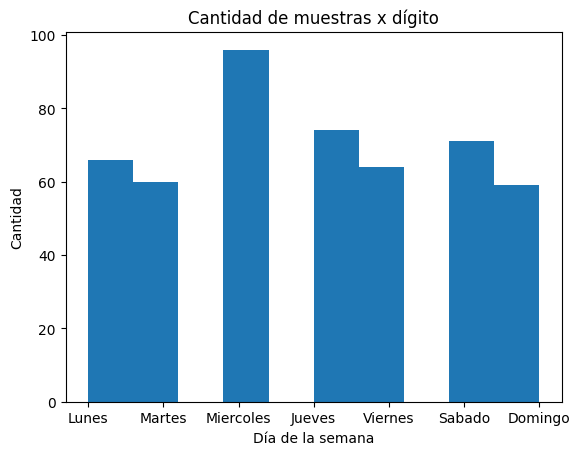

In [9]:
plt.figure()
plt.title("Cantidad de muestras x dígito")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y, bins=10)
plt.plot()
y

### Visualizando el `dataset`

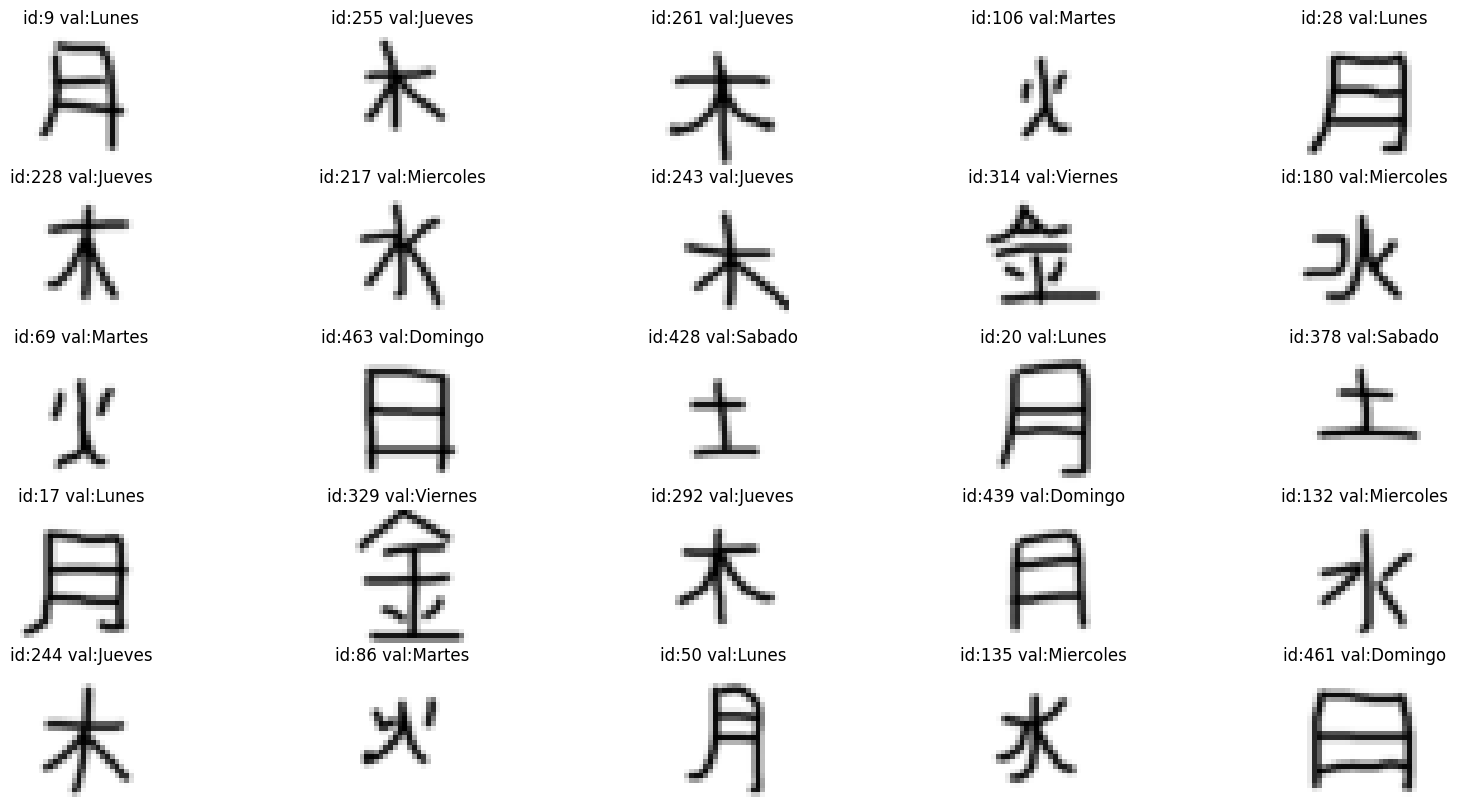

In [10]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

### Split de train-test

In [11]:
X.shape

(490, 28, 28)

In [13]:
#Convertimos y a un array de números
print(y.shape[0])
print(y[2])
y_n = np.empty((y.shape[0]))

for i in range(y.shape[0]):
    if y[i] == 'Lunes': y_n[i] = 0;
    if y[i] == 'Martes': y_n[i] = 1;
    if y[i] == 'Miercoles': y_n[i] = 2;
    if y[i] == 'Jueves': y_n[i] = 3;
    if y[i] == 'Viernes': y_n[i] = 4;
    if y[i] == 'Sabado': y_n[i] = 5;
    if y[i] == 'Domingo': y_n[i] = 6;

y_n


490
Lunes


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3.

In [14]:
#Separamos el dataset en un grupo de entrenamiento y uno de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y_n, test_size=0.20, random_state=42, stratify=y)

[]

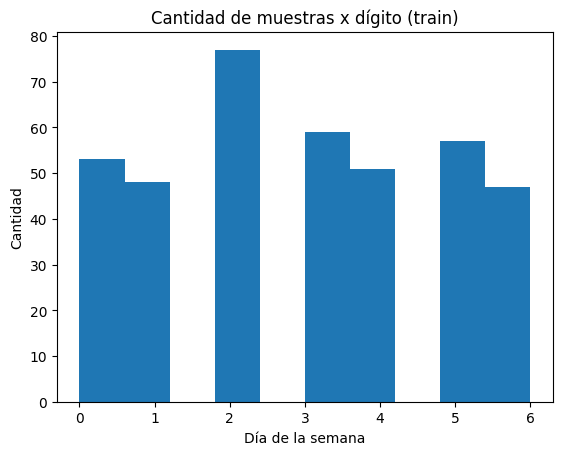

In [15]:
plt.figure()
plt.title("Cantidad de muestras x dígito (train)")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y_train, bins=10)
plt.plot()

[]

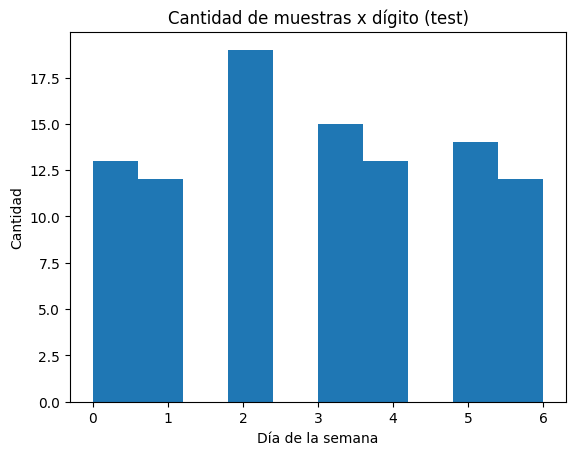

In [16]:
plt.figure()
plt.title("Cantidad de muestras x dígito (test)")
plt.ylabel("Cantidad")
plt.xlabel("Día de la semana")
plt.hist(y_test, bins=10)
plt.plot()

In [17]:
# Ajustamos las dimensiones de las imágenes
print(X_train.shape, X_test.shape)
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(392, 28, 28) (98, 28, 28)
(392, 28, 28, 1) (98, 28, 28, 1)


## Definimos un modelo

In [18]:
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flattenf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD

bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(7, activation='softmax')]) #no modificar

optimizer1=SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

2023-10-12 19:08:16.520942: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-12 19:08:16.524834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 19:08:16.616705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 19:08:16.617861: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 19:08:18.589839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

## Entrenamiento